# External modules

In [1]:
library(tidyverse)
library(readr)
library(DescTools)
library(Hmisc)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘Hmisc’


The following objects are masked from ‘package:DescTools’:

    %nin%, Label, Mean, Quantile


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units




# Internal functions

In [2]:
path <- ".."

xfun::in_dir(dir = path, expr = source("./src/impute_outliers.R"))
xfun::in_dir(dir = path, expr = source("./src/extract_nlargest_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/extract_block_maxima.R"))
xfun::in_dir(dir = path, expr = source("./src/extract_block_maxima_with_indexes.R"))

xfun::in_dir(dir = path, expr = source("./src/get_standard_scaled_data.R"))
xfun::in_dir(dir = path, expr = source("./src/get_one_hot_encoded_data.R"))
xfun::in_dir(dir = path, expr = source("./src/get_one_hot_encoded_and_standard_scaled_data.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_modes.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_modes.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_gev_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_gev_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_gev_parameters.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_gev_model_quantile.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_single_gev_model.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_several_gev_models.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_ns_gev_parameters.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_single_ns_gev_model.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_several_ns_gev_models.R"))

xfun::in_dir(dir = path, expr = source("./src/get_ns_gev_model_normalized_parameters.R"))
xfun::in_dir(dir = path, expr = source("./src/get_several_ns_gev_model_normalized_parameters.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_gev_mixture_model_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_several_standardized_block_maxima_mean.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_several_ns_standardized_block_maxima_mean.R"))

xfun::in_dir(dir = path, expr = source("./src/plot_several_standardized_block_maxima_mean.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_several_ns_standardized_block_maxima_mean.R"))

xfun::in_dir(dir = path, expr = source("./src/fit_stationary_gev_mixture_model.R"))
xfun::in_dir(dir = path, expr = source("./src/fit_non_stationary_gev_mixture_model.R"))

xfun::in_dir(dir = path, expr = source("./src/plot_fit_stationary_gev_mixture_model.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_fit_non_stationary_gev_mixture_model.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_stationary_gev_mixture_model_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_stationary_gev_mixture_model_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_stationary_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_stationary_gev_mixture_model_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_non_stationary_gev_mixture_model_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_non_stationary_gev_mixture_model_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_non_stationary_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_non_stationary_gev_mixture_model_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_stationary_gev_mixture_model_quantile.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_non_stationary_gev_mixture_model_quantile.R"))

xfun::in_dir(dir = path, expr = source("./src/plot_estimate_stationary_gev_mixture_model_quantile.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_estimate_non_stationary_gev_mixture_model_quantile.R"))


Loading required package: lattice


Attaching package: ‘caret’


The following objects are masked from ‘package:DescTools’:

    MAE, RMSE


The following object is masked from ‘package:purrr’:

    lift




In [3]:
options(repr.plot.width=19, repr.plot.height=12)

# Data

In [4]:
data <- xfun::in_dir(dir = path, expr = read.csv(file = "./03_application_flow_wind_O/flow.txt", header = FALSE, sep = " "))

In [5]:
str(data)

'data.frame':	45028 obs. of  3 variables:
 $ V1: chr  "01/01/1920" "02/01/1920" "03/01/1920" "04/01/1920" ...
 $ V2: num  NA NA NA NA NA NA NA NA NA NA ...
 $ V3: num  4420 4160 4230 4150 4120 3840 3660 3460 3240 3000 ...


In [6]:
x_raw <- data$V3

# Data description

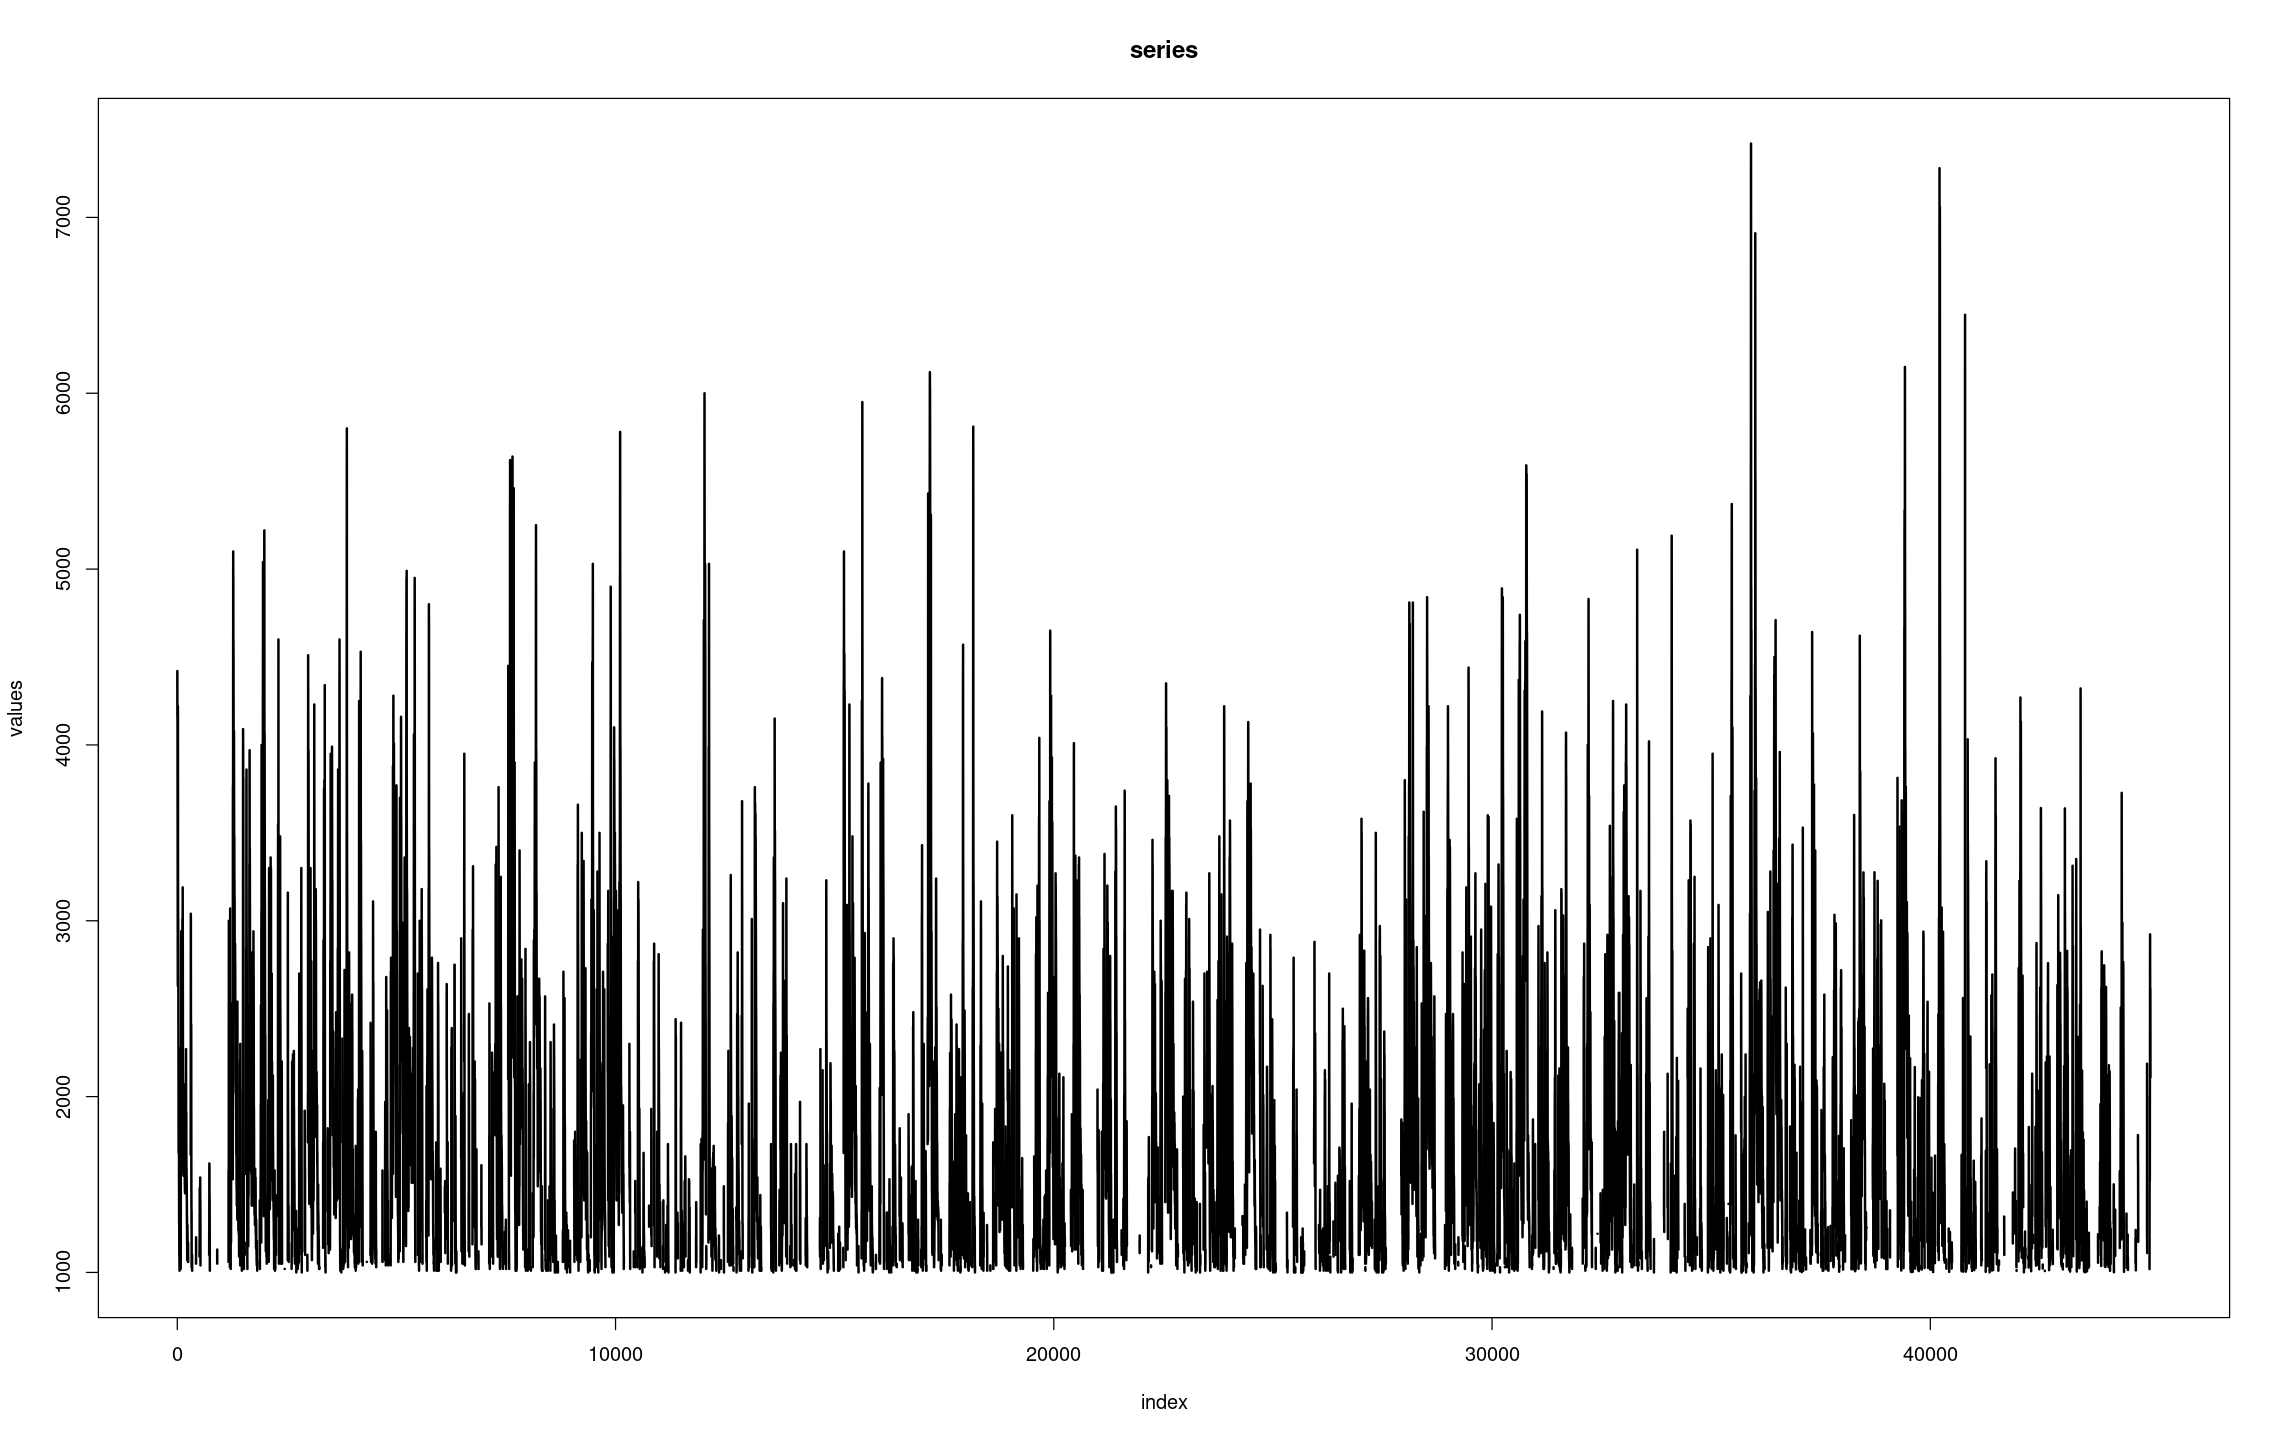

In [7]:
options(repr.plot.width=19, repr.plot.height=12)

plot(x_raw, 
     type = "l", 
     lwd = 2, 
     ylab = "values", 
     xlab = "index",
    main = "series")
abline(h = 0, lty = "dotted", col = 7, lwd = 2)


In [8]:
x <- x_raw

------------------------------------------------------------------------------ 
x (numeric)

      length           n         NAs      unique          0s        mean'
      45'028      22'170      22'858       3'478           0  1'849.1337
                   49.2%       50.8%                    0.0%            
                                                                        
         .05         .10         .25      median         .75         .90
  1'047.4785  1'100.0000  1'260.0000  1'620.0000  2'210.0000  2'900.0000
                                                                        
       range          sd       vcoef         mad         IQR        skew
  6'420.0000    780.9616      0.4223    622.6920    950.0000      1.5818
                                                                        
      meanCI
  1'838.8531
  1'859.4143
            
         .95
  3'400.0000
            
        kurt
      3.2736
            
lowest : 1'000.0 (107), 1'000.2400, 1'000.2700

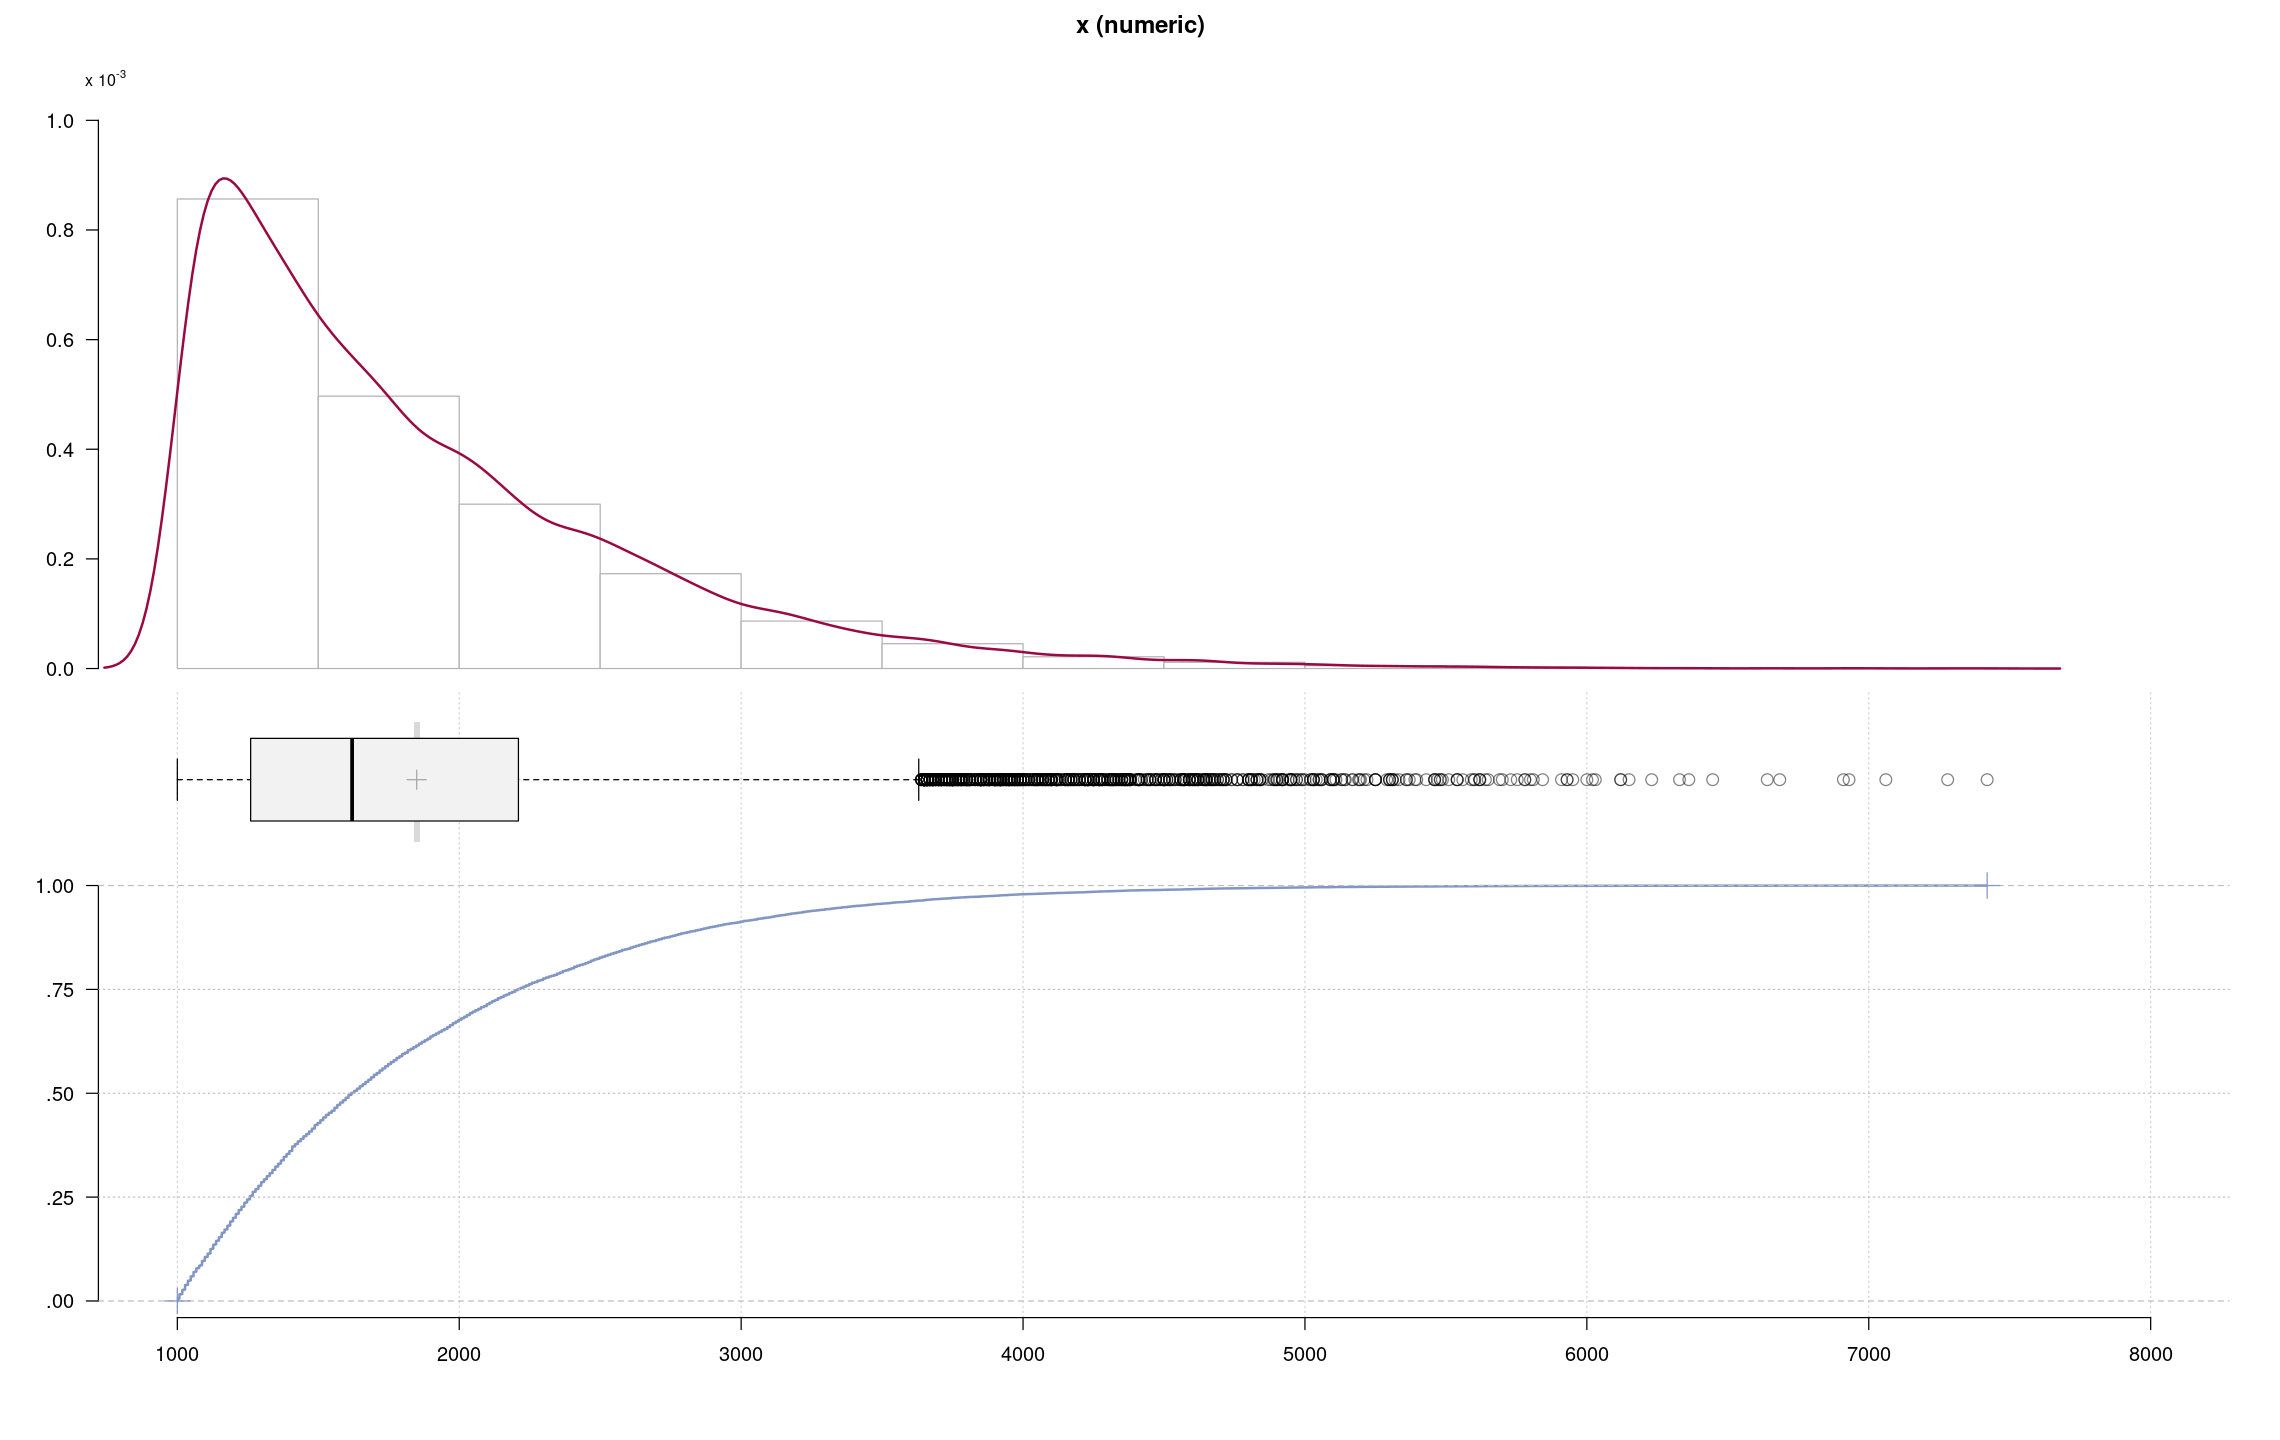

In [9]:
options(repr.plot.width=19, repr.plot.height=12)

Desc(x)

In [10]:
x <- x_raw[!is.na(x_raw)]
n <- length(x)

describe(x)

x 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   22170        0     3478        1     1849    811.5     1047     1100 
     .25      .50      .75      .90      .95 
    1260     1620     2210     2900     3400 

lowest : 1000    1000.24 1000.27 1000.47 1000.74
highest: 6910    6930    7060.54 7279.88 7420   

In [11]:
# options(repr.plot.width=19, repr.plot.height=12)
# 
# nlargest <- 3000
# y <- extract_nlargest_sample(x, n = nlargest)
# Desc(y)

# EVA: Stationary case

## Estimation

In [12]:
minimum_block_size <- find_minimum_block_size(x, threshold = NULL)

print(minimum_block_size)

[1] 1


In [13]:
maximum_block_size <- find_block_size_associated_with_given_number_of_blocks(x, m = 50)

print(maximum_block_size)

[1] 443


In [14]:
maxima <- extract_block_maxima(x, block_size = minimum_block_size)

print(min(maxima))

[1] 1000


In [15]:
print(median(x))

[1] 1620


In [16]:
print(calculate_mode(x))

[1] 1162.142608


In [17]:
candidate_block_sizes <- get_candidate_block_sizes(x, threshold = NULL, m = 50)

print(candidate_block_sizes)

  [1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
 [19]  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
 [37]  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
 [55]  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
 [73]  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
 [91]  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
[109] 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
[127] 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
[145] 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
[163] 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
[181] 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
[199] 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
[217] 217 218 219 220 221 222 223 224 225 226 227 228 229 230 23

In [39]:
y <- x[x > quantile(x = x, probs = 0.5)]

In [40]:
gev_mixture_model_object <- fit_stationary_gev_mixture_model(x = y,
                                                             nlargest = Inf,
                                                             block_sizes = NULL,
                                                             minimum_nblocks = 50,
                                                             threshold = NULL,
                                                             confidence_level = 0.95,
                                                             use_extremal_index = TRUE,
                                                             use_uniform_prior = TRUE,
                                                             method = c("MLE", "GMLE", "Lmoments")[1])

In [41]:
print(names(gev_mixture_model_object))

 [1] "threshold"                            
 [2] "candidate_block_sizes"                
 [3] "equivalent_block_sizes"               
 [4] "unequivalent_block_sizes"             
 [5] "selected_block_sizes"                 
 [6] "unselected_block_sizes"               
 [7] "failed_block_sizes"                   
 [8] "use_uniform_prior"                    
 [9] "weights"                              
[10] "frequencies"                          
[11] "use_extremal_index"                   
[12] "extremal_indexes"                     
[13] "negative_log_likelihoods"             
[14] "information_criteria"                 
[15] "unnormalized_gev_parameters_object"   
[16] "normalized_gev_parameters_object"     
[17] "full_normalized_gev_parameters_object"
[18] "partial_data"                         
[19] "all_data"                             
[20] "selected_model_per_obs"               
[21] "selected_gev_models"                  
[22] "several_residuals"                    
[23] "seve

In [42]:
print(gev_mixture_model_object$full_normalized_gev_parameters_object)

        loc_star   scale_star       shape_star
9   2411.1770217  530.7927455  1.794661558e-01
10  2388.0349009  532.1832296  1.613812820e-01
11  2422.0945884  523.6925251  1.717462970e-01
12  2398.2213995  534.6492437  1.500013019e-01
13  2409.6161565  529.1619676  1.488042660e-01
14  2365.8890153  518.4553334  1.615636331e-01
15  2388.7939655  537.7360284  1.394623534e-01
16  2344.1341425  558.6043470  1.264513987e-01
17  2342.3401926  531.7203344  1.426210736e-01
18  2338.2738525  561.3217056  1.171839707e-01
19  2319.3620555  559.9158669  1.091567677e-01
20  2316.7516579  548.2570832  1.238644710e-01
21  2324.6407895  541.9399544  1.278325011e-01
22  2325.1612281  548.0028856  1.252529439e-01
23  2307.2663751  559.3900412  1.059437238e-01
24  2269.3206868  580.9290807  8.981726895e-02
25  2263.8139866  588.3511570  8.723590232e-02
26  2305.6105272  542.8540683  1.161064854e-01
27  2333.0230258  526.2594022  1.382192413e-01
28  2283.1752850  545.7228330  1.213070004e-01
29  2298.8891

In [43]:
print(gev_mixture_model_object$weights)

             9             10             11             12             13 
0.003895438237 0.004715530497 0.004715530497 0.005125576627 0.004510507432 
            14             15             16             17             18 
0.004715530497 0.003997949769 0.005638134290 0.004305484367 0.004305484367 
            19             20             21             22             23 
0.004202972834 0.004920553562 0.004613018965 0.004920553562 0.004510507432 
            24             25             26             27             28 
0.004510507432 0.005843157355 0.003485392107 0.004202972834 0.004305484367 
            29             30             31             32             33 
0.004920553562 0.003177857509 0.005023065095 0.003587903639 0.004100461302 
            34             35             36             37             38 
0.004920553562 0.004407995900 0.003690415172 0.004202972834 0.005638134290 
            39             40             41             42             43 
0.0059456688

In [44]:
print(which.max(gev_mixture_model_object$weights))

106 
 98 


In [45]:
print(which.max(gev_mixture_model_object$full_normalized_gev_parameters_object$shape_star))

[1] 1


In [46]:
print(which.min(gev_mixture_model_object$full_normalized_gev_parameters_object$shape_star))

[1] 182


In [47]:

print(gev_mixture_model_object$information_criteria)

        AIC         BIC 
207117.4499 213339.7261 


In [30]:
print(gev_mixture_model_object$threshold)

[1] 1099.99


In [31]:
print(gev_mixture_model_object$equivalent_block_sizes)

  [1]  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29
 [19]  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47
 [37]  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
 [55]  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
 [73]  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 [91] 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
[109] 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
[127] 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
[145] 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173
[163] 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191
[181] 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209
[199] 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227
[217] 228 229 230 231 232 233 234 235 236 237 238 239 240 241 24

In [32]:
print(gev_mixture_model_object$extremal_indexes)

           12            13            14            15            16 
0.07235559828 0.07214137714 0.07214137714 0.07214137714 0.07175636781 
           17            18            19            20            21 
0.07214137714 0.07050489112 0.07214137714 0.07050489112 0.07050489112 
           22            23            24            25            26 
0.06814707103 0.06809350953 0.07050489112 0.06809350953 0.07050489112 
           27            28            29            30            31 
0.06809350953 0.06809350953 0.06296499109 0.06809350953 0.06415221639 
           32            33            34            35            36 
0.06459446229 0.06814707103 0.06296499109 0.06296499109 0.06385097742 
           37            38            39            40            41 
0.06657575627 0.06296499109 0.06385097742 0.06285964499 0.06293129526 
           42            43            44            45            46 
0.06385097742 0.06285964499 0.06296499109 0.06285964499 0.06200298718 
      

## Diagnostic

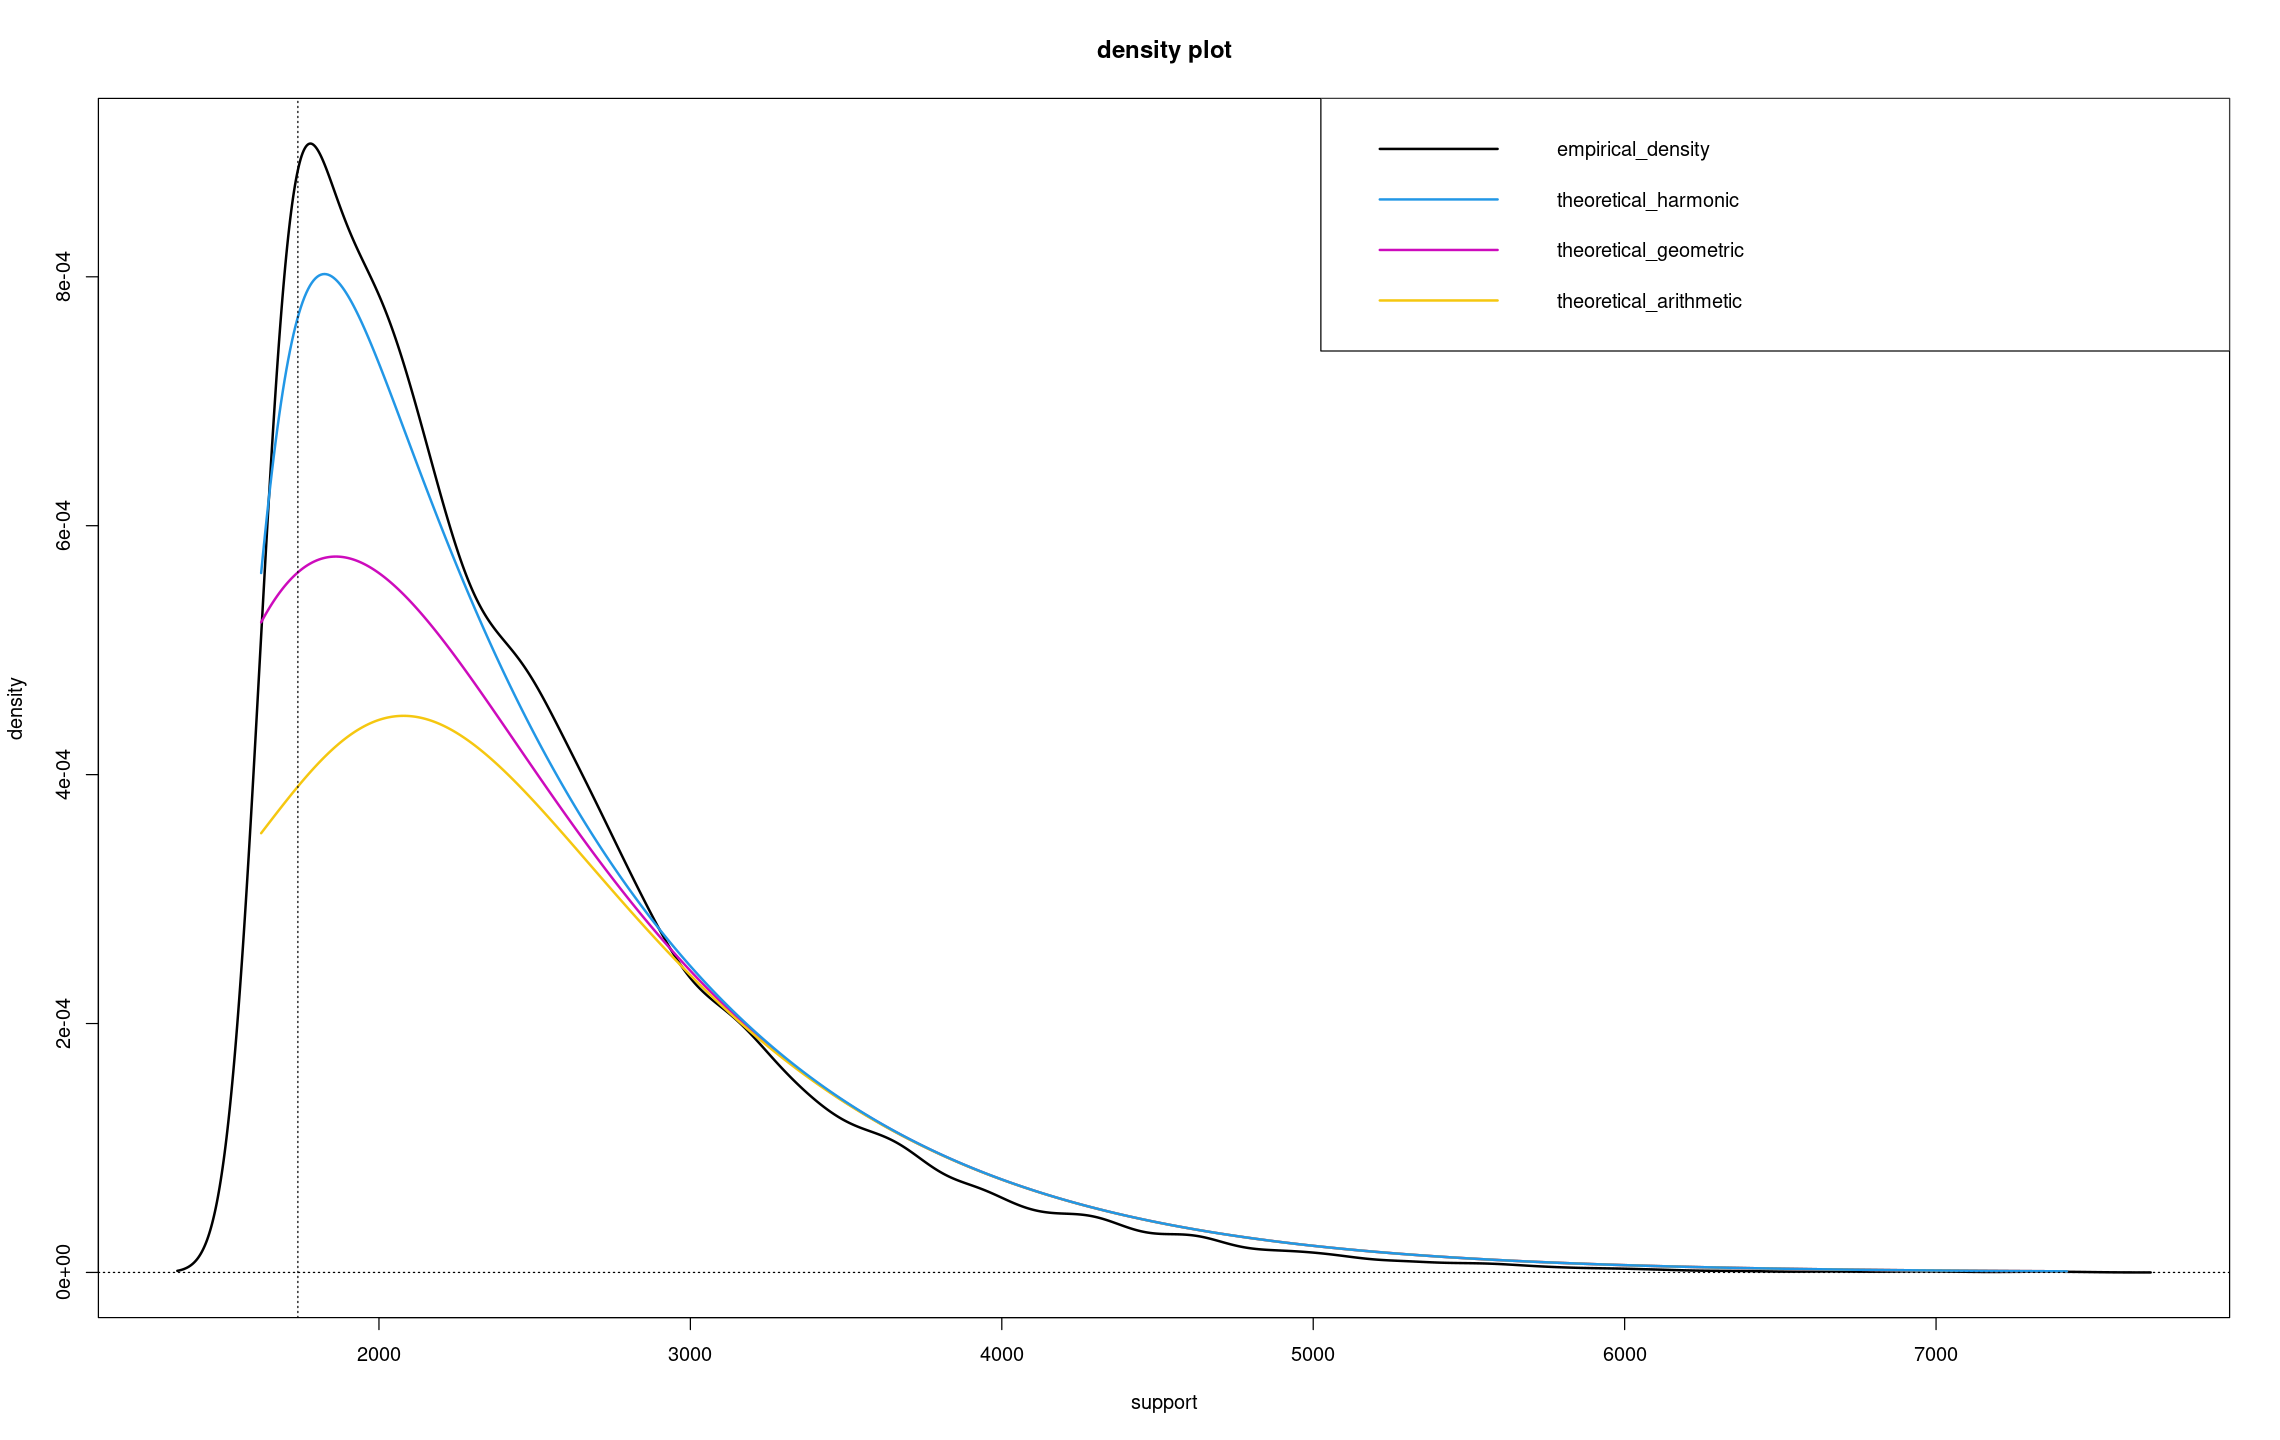

In [48]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_stationary_gev_mixture_model(gev_mixture_model_object,
                                      model_index = 0,
                                      xlab = "support",
                                      ylab = "density",
                                      main = "density plot",
                                      legend_position = "topright")

In [ ]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_stationary_gev_mixture_model(gev_mixture_model_object,
                                      model_index = which.max(gev_mixture_model_object$weights),
                                      xlab = "support",
                                      ylab = "density",
                                      main = "density plot",
                                      legend_position = "topright")

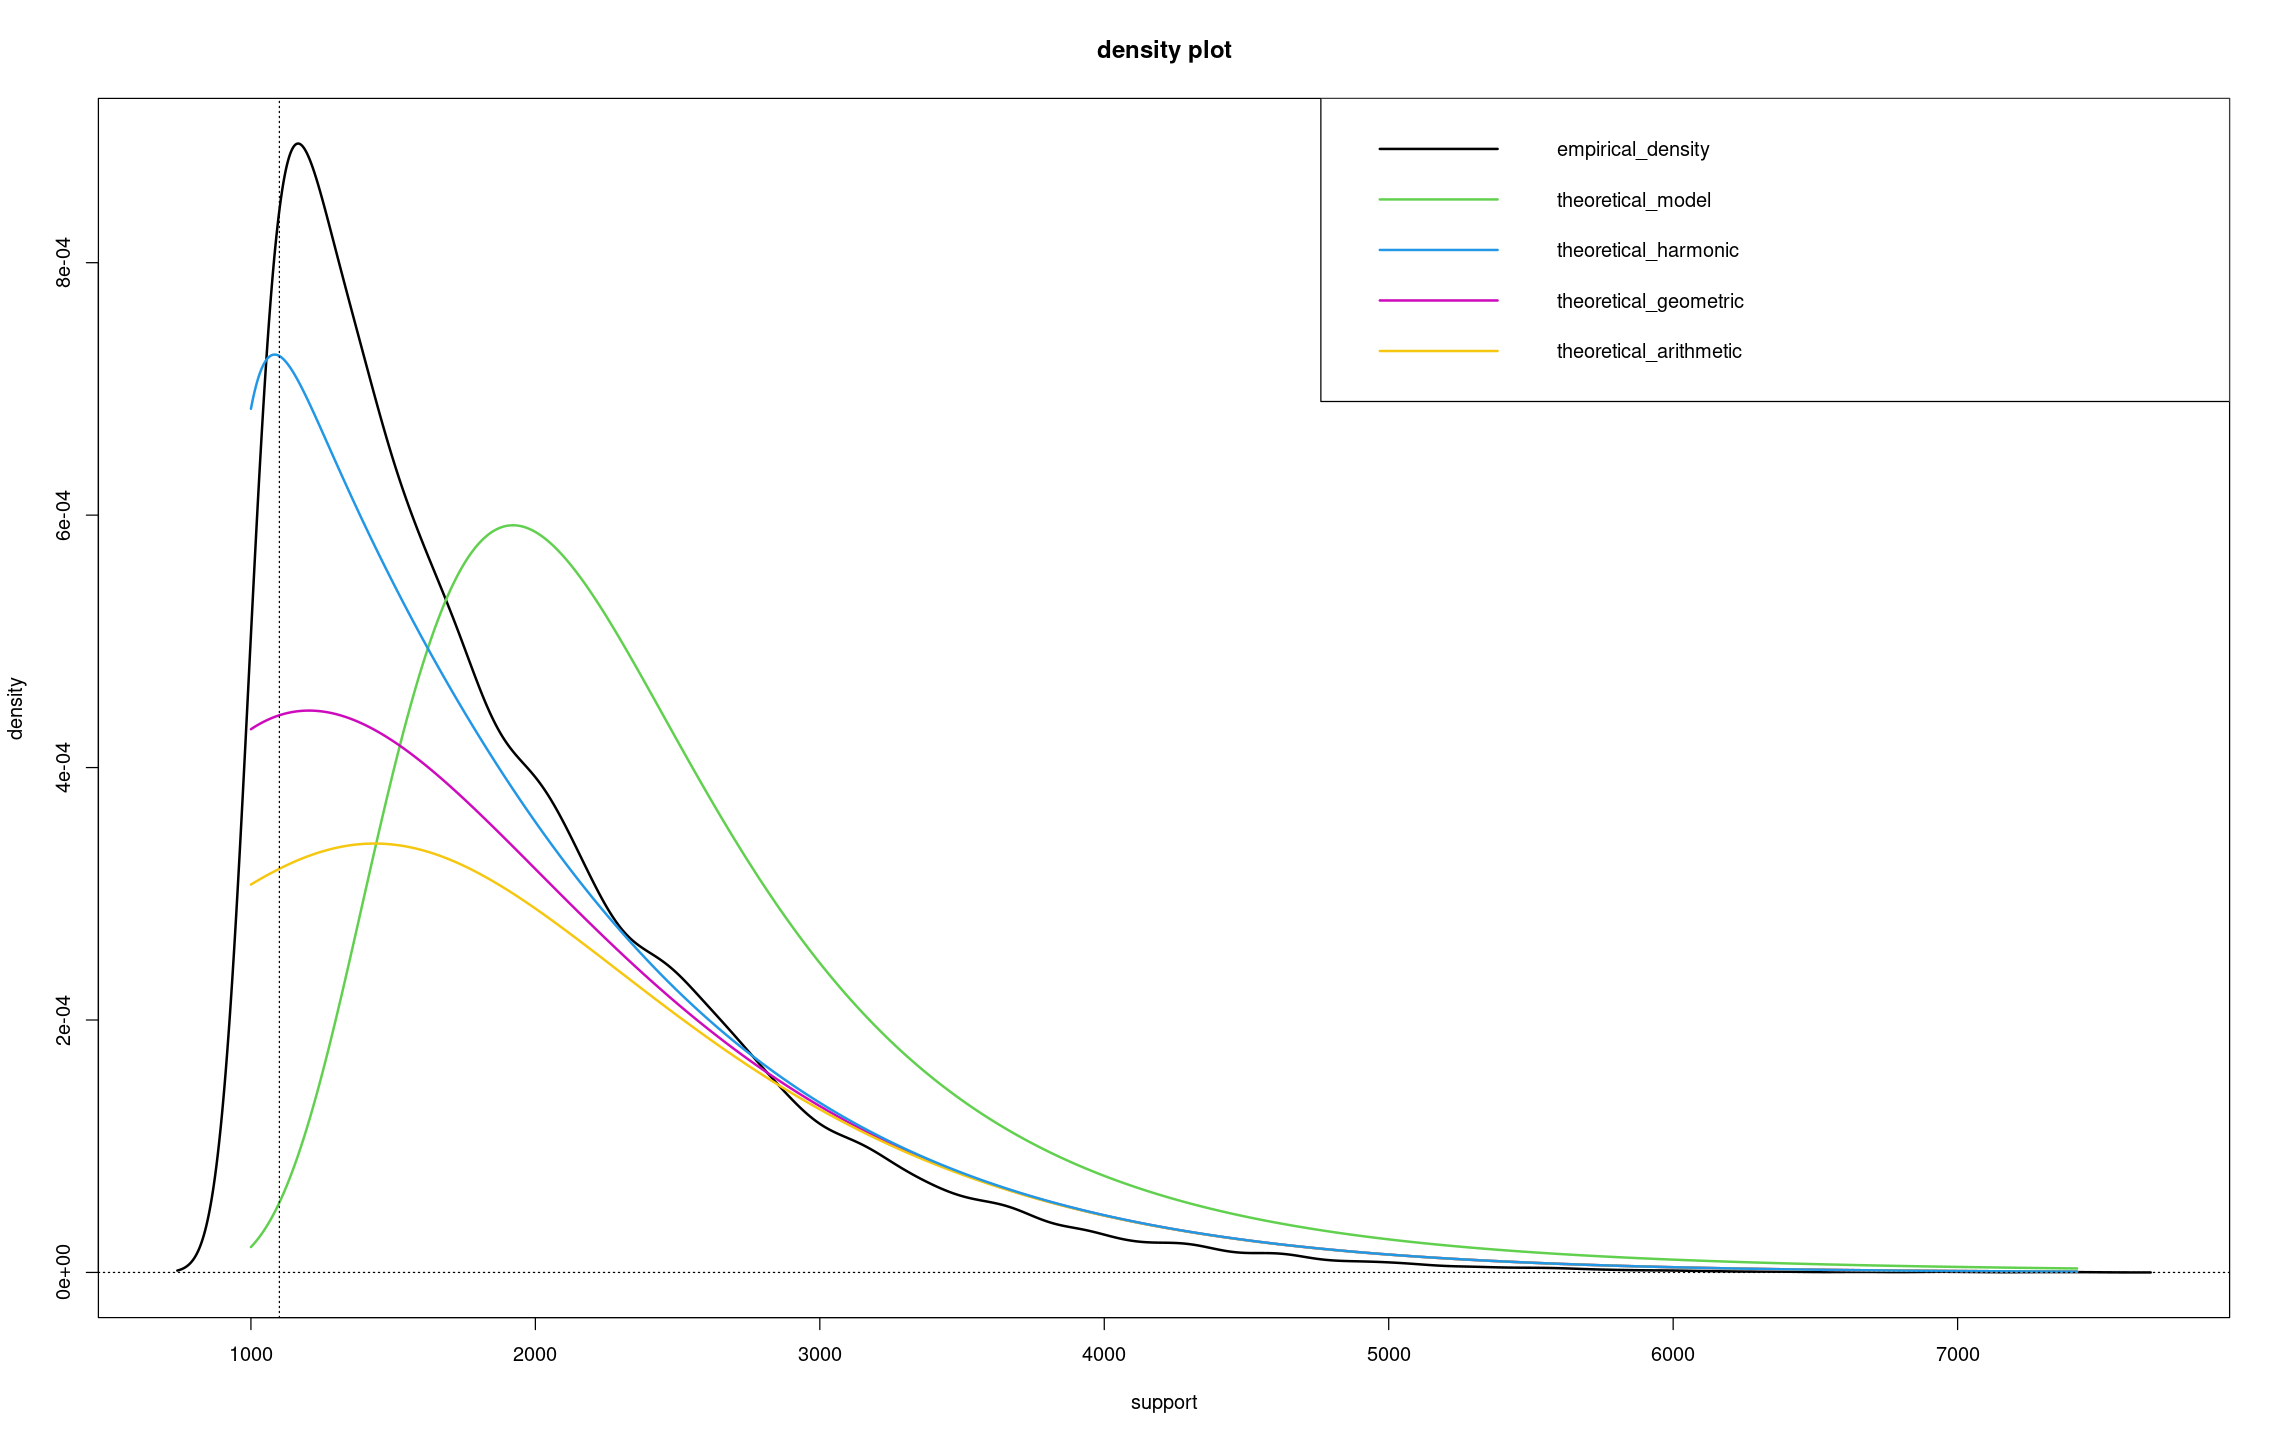

In [35]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_stationary_gev_mixture_model(gev_mixture_model_object,
                                      model_index = which.max(gev_mixture_model_object$full_normalized_gev_parameters_object$shape_star),
                                      xlab = "support",
                                      ylab = "density",
                                      main = "density plot",
                                      legend_position = "topright")

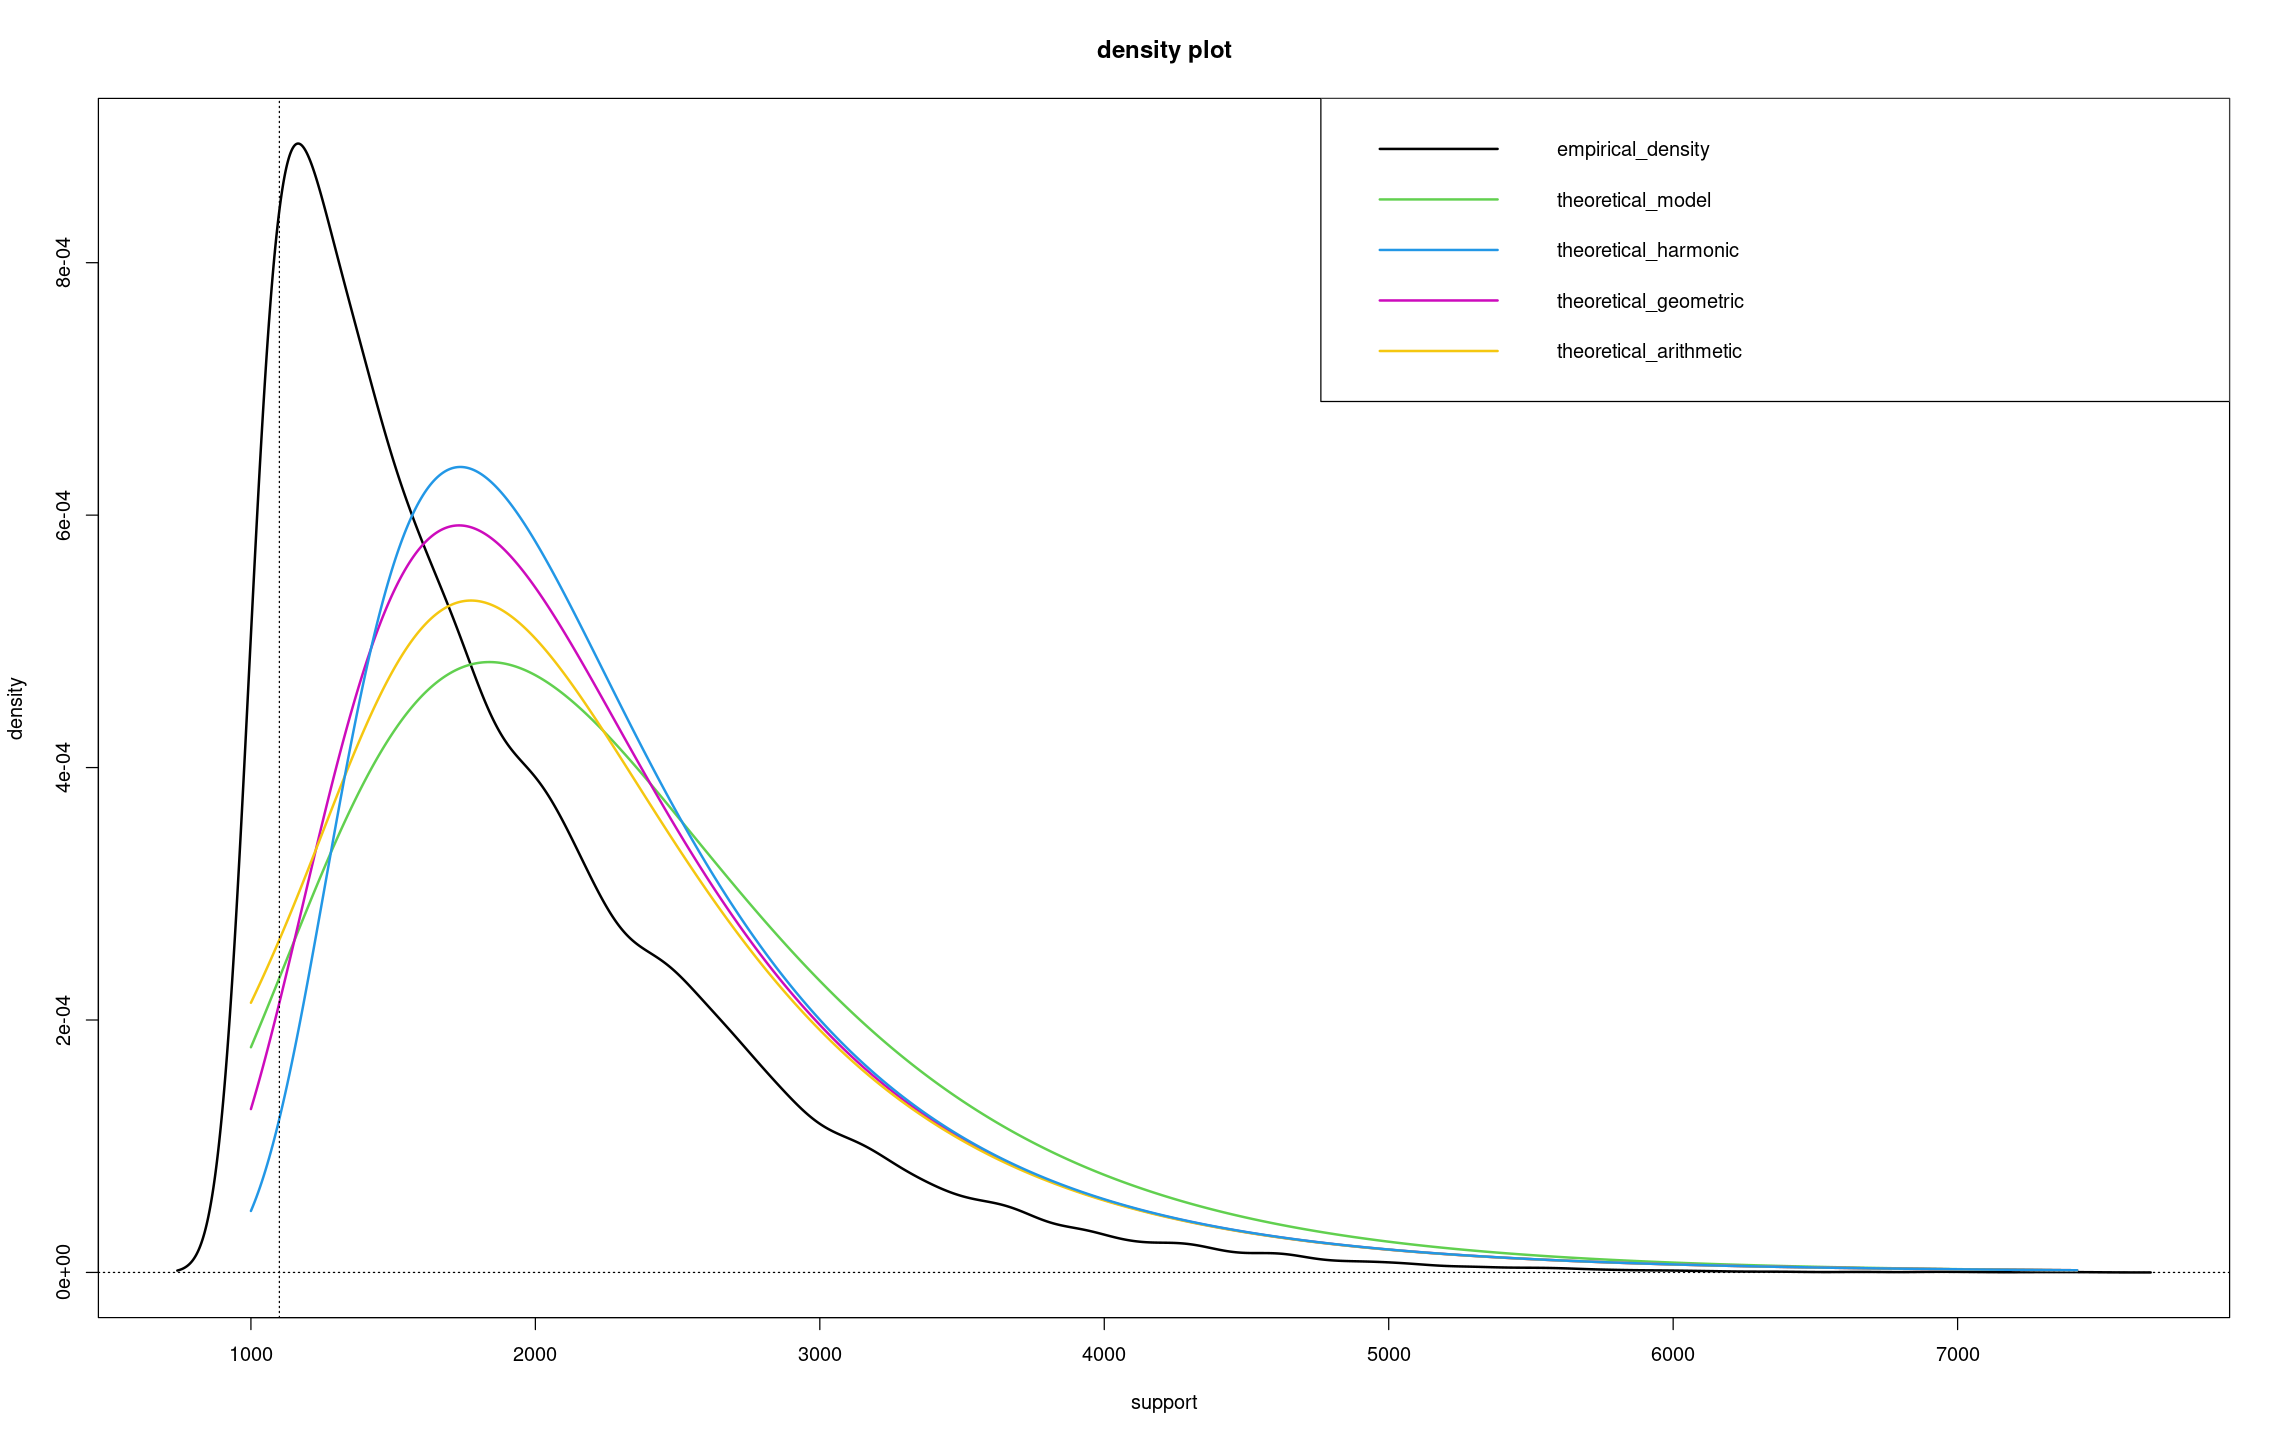

In [143]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_stationary_gev_mixture_model(gev_mixture_model_object,
                                      model_index = which.min(gev_mixture_model_object$full_normalized_gev_parameters_object$shape_star),
                                      xlab = "support",
                                      ylab = "density",
                                      main = "density plot",
                                      legend_position = "topright")

## Quantiles

In [36]:
m <- 366*10000

In [37]:
alpha <- m^(-1)

alpha

[1] 2.732240437e-07

In [43]:
alpha <- n^(-2)

print(alpha)

[1] 8.888221364e-09


In [44]:
true_quantile <- NULL

print(true_quantile)

NULL


In [38]:
results_geometric <- estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                                    alpha = alpha,
                                                                    do.ci = TRUE,
                                                                    confidence_level = 0.95,
                                                                    kind = c("geometric", "arithmetic", "harmonic")[1],
                                                                    iterations = 100)

results_geometric

,lower_bound,estimate,upper_bound
,<dbl>,<dbl>,<dbl>
12,24702.127650,44952.96521,65203.80276
13,21002.792383,37391.78955,53780.78671
14,20537.773467,38223.64287,55909.51226
15,19814.193419,37389.68002,54965.16662
16,17123.467012,30666.99262,44210.51822
17,15877.669123,29543.99724,43210.32536
18,15858.289829,29224.67754,42591.06525
19,14786.424066,27469.14118,40151.85829
20,12703.245737,21467.76844,30232.29113


In [72]:
results_arithmetic <- estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                                     alpha = alpha,
                                                                     do.ci = TRUE,
                                                                     confidence_level = 0.95,
                                                                     kind = c("geometric", "arithmetic", "harmonic")[2],
                                                                     iterations = 100)

results_arithmetic

,lower_bound,estimate,upper_bound
,<dbl>,<dbl>,<dbl>
113,3538.0292895,14809.27936,26080.52943
120,5125.7490036,11582.36383,18038.97865
121,4554.1889932,12949.25722,21344.32544
123,4290.5411246,13103.06531,21915.58949
128,4949.8249384,12217.99301,19486.16109
130,4675.7619646,11159.19449,17642.62702
138,-397.7211485,15957.22923,32312.17961
142,5045.9568784,11459.92408,17873.89129
158,-1786.4045111,16458.56940,34703.54330


In [73]:
results_harmonic <- estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                                     alpha = alpha,
                                                                     do.ci = TRUE,
                                                                     confidence_level = 0.95,
                                                                     kind = c("geometric", "arithmetic", "harmonic")[3],
                                                                     iterations = 100)

results_harmonic

,lower_bound,estimate,upper_bound
,<dbl>,<dbl>,<dbl>
113,3538.0292895,14809.27936,26080.52943
120,5125.7490036,11582.36383,18038.97865
121,4554.1889932,12949.25722,21344.32544
123,4290.5411246,13103.06531,21915.58949
128,4949.8249384,12217.99301,19486.16109
130,4675.7619646,11159.19449,17642.62702
138,-397.7211485,15957.22923,32312.17961
142,5045.9568784,11459.92408,17873.89129
158,-1786.4045111,16458.56940,34703.54330


In [74]:
options(repr.plot.width=23, repr.plot.height=6)

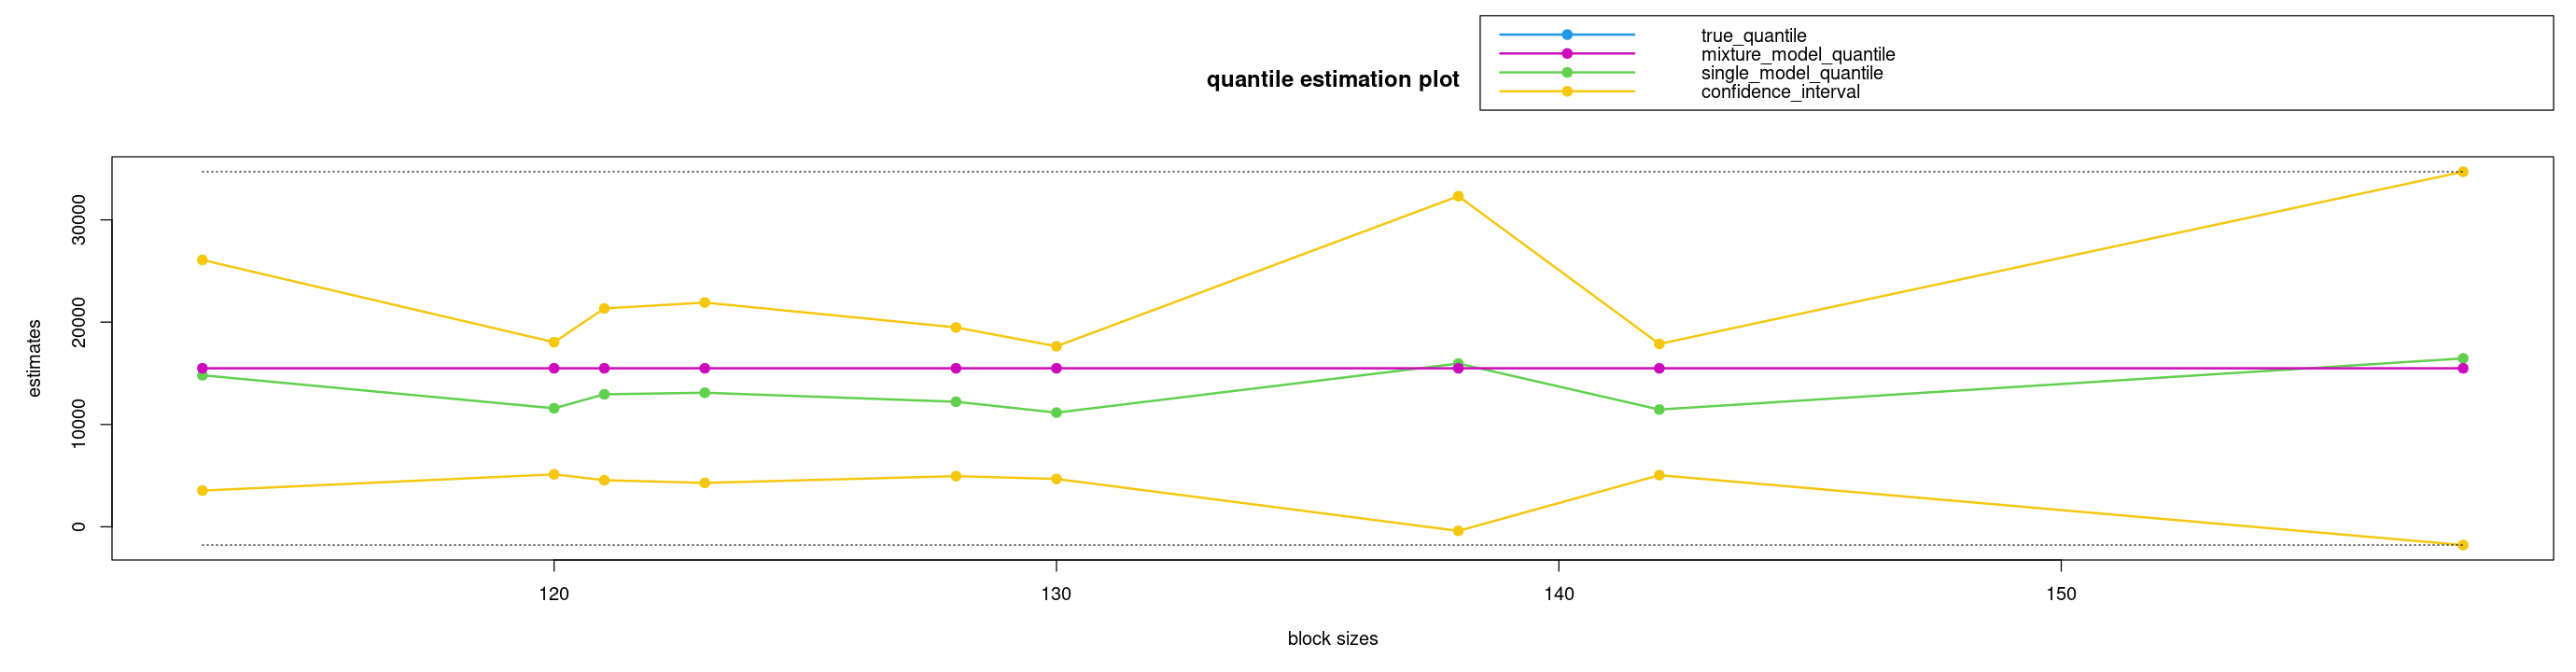

In [75]:
options(repr.plot.width=23, repr.plot.height=6)

plot_estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                    alpha = alpha,
                                                    true_quantile = NULL,
                                                    do.ci = TRUE,
                                                    confidence_level = 0.95,
                                                    kind = c("geometric", "arithmetic", "harmonic")[1],
                                                    iterations = 100,
                                                    xlab = "block sizes",
                                                    ylab = "estimates",
                                                    main = "quantile estimation plot",
                                                    legend_position = "topright")